['hindu_temple', 'shuttlecock', 'araneus_gemma', 'fire_extinguisher']


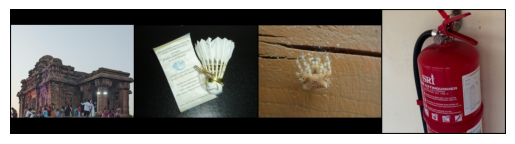

In [1]:
import torch
import torchvision
from torch.utils.data import Dataset
import torchvision.transforms.functional as fn
import torchvision.transforms as T
import matplotlib.pyplot as plt
from utilities import createAnnotation
from model_loader import get_new_model
import pandas as pd
from IPython.display import display
from PIL import Image 
import random
import numpy as np
import tqdm as notebook_tqdm
import gradio as gr
from Dataset import *

In [2]:
# returns just its input
# needed for some outputs
def self(item):
    return item

In [3]:
emails = {'testemail': 1}
userId = 1

In [4]:
# returns the labels per image which have to be evaluated and the indices of the images
def loadDataFromModel(batchSize):
    batch, batch3dim, indexList = createRandomBatch(batchSize)
    model = get_new_model("convnext_tiny", not_original=True)
    samples = feedModel(batch)
    
    labels = []
    # just for test purpose
    for i in range(0, batchSize):
        labels.append([i])
    
  # !!!!!!! labels = (use function from issue #18)
    return labels, indexList

In [5]:
# generates the whole evaluation output
def generateEval(batchSize, uId):
    batchSize = int(batchSize)
    labels, indexList = loadDataFromModel(batchSize)
    
    for i in range(0, batchSize):
        displayEval(imageDataset.__getitem__(indexList[i])[0], labels[i], uId)

In [6]:
# user selected IID
def selectIid(uId):
  # update json
    return 0

# user selected OOD    
def selectOod(uId):
  # update json
    return 0

# user selected abstinent
def selectAbstinent(uId):
  # update json
    return 0

# shows an image, the labels and three buttons
def displayEval(imgPath, labels, uId):
    with gr.Blocks() as demo:
        gr.Markdown('''Please decide if the image is in 'independent identically distribution' (IID) or 'out of distribution' (OOD) related to the predicted labels of the model.
        If your are not sure choose 'abstinent'. ''')
        fn = self
        inputs = gr.Image(imgPath)
        outputs = None
        gr.Markdown('''The top labels predicted by the model:''')
        for i in range (0, len(labels)):
            gr.Markdown(f'''{labels[i]}''')
        with gr.Row():
            iidBtn = gr.Button("IID")
            oodBtn = gr.Button("OOD")
            abstinentBtn = gr.Button("abstinent")
        userId = gr.Textbox(visible = False, value = uId)
        iidBtn.click(fn=selectIid, inputs=userId, outputs=None, api_name="IID")
        oodBtn.click(fn=selectOod, inputs=userId, outputs=None, api_name="OOD")
        abstinentBtn.click(fn=selectAbstinent, inputs=userId, outputs=None, api_name="abstinent")
    
    demo.launch()

In [7]:
# asks for the amount of images the user want to evaluate
def askAmount(uId):
        with gr.Blocks() as demo:
            batchSize = gr.Textbox(label="Please enter the amount of images you want to evaluate:", placeholder="positive number")
            userId = gr.Textbox(visible = False, value=uId)
            startBtn = gr.Button("Start")
            startBtn.click(fn=generateEval, inputs = [batchSize, userId], outputs=None, api_name="Start")
        
        demo.launch()

In [8]:
# generates a new userId and updates the emails dict
def generateId(mail):
    global userId
    userId += 1
    global emails
    emails.update({mail: userId})
    return userId
        
# checks if the participant already owns a userId
# if not: a userId gets generated
def checkMail(mail):
    alreadyId = False
    for email, uId in emails.items():
        if email == mail:
            with gr.Blocks() as demo:
                gr.Markdown(f'''
                You already have an userId. Keep it in mind: {uId}
                ''')
                gr.Markdown('''Please sign in again!''')
                backToSignInBtn = gr.Button("Back to sign in")
                backToSignInBtn.click(fn=generateSignIn, inputs=None, outputs=None, api_name="Back to sign in")
                
            demo.launch()
            alreadyId = True
            break
            
    if alreadyId == False:
        newId = generateId(mail)
        with gr.Blocks() as demo:
            gr.Markdown(f'''
            That´s your personal userId which is just generated for your sign-in: {newId}
            ''')
            gr.Markdown('''Please keep it in mind and sign in again!''')
            backToSignInBtn = gr.Button("Back to sign in")
            backToSignInBtn.click(fn=generateSignIn, inputs=None, outputs=None, api_name="Back to sign in")
        
        demo.launch()
        
# handles the sign-in-input
# checks whether the potentially given email already has an userId or not
def handleFirstIn(idOrMail):
    try: 
        int(idOrMail)
    except:
        checkMail(idOrMail)
    else: 
        askAmount(idOrMail) 

# generates the sign-in page 
def generateSignIn():
    with gr.Blocks() as demo:
        idOrMail = gr.Textbox(label="Please enter your UserID or, in case you don´t have one yet, please enter your e-mail address:", placeholder="UserID or e-mail")
        signInBtn = gr.Button("Sign in")
        signInBtn.click(fn=handleFirstIn, inputs=idOrMail, outputs=None, api_name="Sign in")

    demo.launch()
    
generateSignIn()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.
